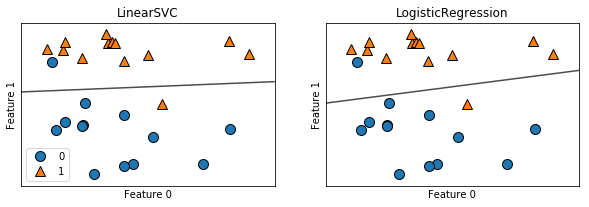

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
from matplotlib import pyplot as plt


X, y = mglearn.datasets.make_forge()

fig , axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax = ax, alpha=.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

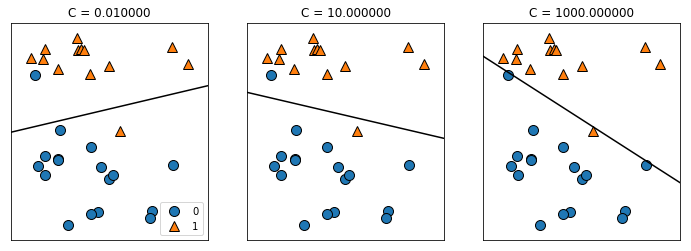

In [4]:
# LinearSVC()、 LogisticRegression() の正則化を強度を決定するパラメータを C と呼び
# Cが大きくなるほど,正則化は弱くなる
# Cを小さくすると、データポイントの大多数に対して適用しようとするが、大きいCを用いると、個々のデーアポイントを正確に分類するようになる
mglearn.plots.plot_linear_svc_regularization()